In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [7]:
print(df.isnull().sum())
# NO NULL VALUES...

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [8]:
# Our Target Variable is 'quality'...
print(df['quality'].value_counts())

Legit    6251
Fraud     246
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

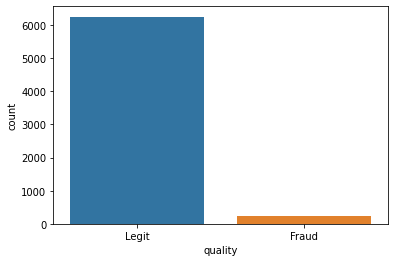

In [9]:
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

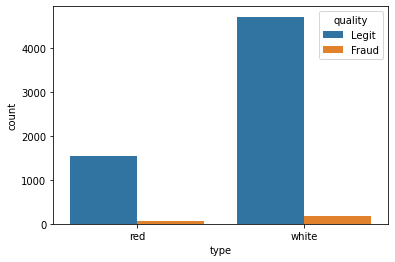

In [10]:
sns.countplot(x='type',hue='quality',data=df)

In [11]:
# Let's analyse percentage of fraud in red, white wine.


print((df['type'] == 'red').value_counts())
# 1599 are Red Wine Bottles.
print((df['type'] == 'white').value_counts())
# 4898 are White Wine Bottles.

False    4898
True     1599
Name: type, dtype: int64
True     4898
False    1599
Name: type, dtype: int64


In [12]:
red_wine = df[df['type'] == 'red']
white_wine = df[df['type'] == 'white']

In [13]:
# Percent of Fraud in red wine :
print("Percentage of Fraud Red Wine:")
print(100* (len(red_wine[red_wine['quality']=='Fraud'])/len(red_wine)))

Percentage of Fraud Red Wine:
3.9399624765478425


In [14]:
# Percent of Fraud in white wine :
print("Percentage of Fraud White Wine:")
print(100* (len(white_wine[white_wine['quality']=='Fraud'])/len(white_wine)))

Percentage of Fraud White Wine:
3.7362188648427925


In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


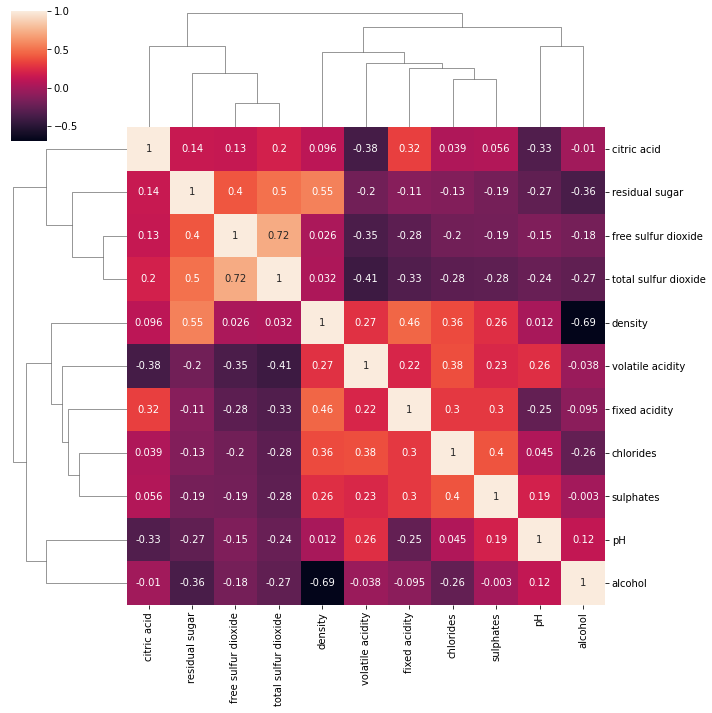

In [16]:
sns.clustermap(data = df.corr(),annot = True)

<b>Machine Learning Model</b>

In [17]:
# Using get_dummies method to encode string to int
df['type'] = pd.get_dummies(df['type'],drop_first = True)

In [18]:
print(df['type'])
print(df['type'].value_counts())
# 0 = Red
# 1 = White

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: uint8
1    4898
0    1599
Name: type, dtype: int64


In [19]:
X = df.drop('quality',axis = 1)
y = df['quality']

In [20]:
print(X,y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [23]:
# Scaling the data :

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)

In [27]:
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC(class_weight= 'balanced')

In [30]:
# Tuning Parameters using GridSearchCV for best performance

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'C':[0.001,0.01,0.1,0.5,1],
    'gamma':['scale','auto']
}

In [33]:
grid = GridSearchCV(param_grid=param_grid,estimator=model)

In [34]:
print(grid)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})


In [35]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [36]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [37]:
grid_preds = grid.predict(scaled_X_test)

In [38]:
grid_preds

array(['Legit', 'Fraud', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Fraud', 'Fraud', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Fraud',
       'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Fraud',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Fraud', 'Legit', 'Legit',
       'Fraud', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Leg

In [39]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [45]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



C:\Users\Rizen3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


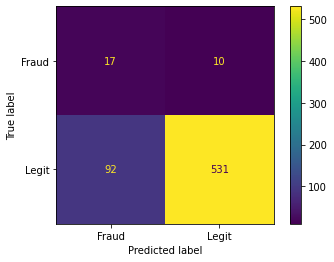

In [46]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

True Negative - 17,
False Positive - 10,
False Negative - 92,
True Positive - 531.